In [71]:
# Load the CSV file
base = '../../rcie-system-metrics-data/'
domain = '2023-05-25_18-13-19_rcie-api-default/'
file = 'metrics-with-output-and-standardized-unit.csv'
file_path = base + domain + file

In [72]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [73]:
col_names = ["time","timestamp","cpu_usage","memory_usage","bandwidth_inbound","bandwidth_outbound","tps","tps_error","response_time","status"]

# Load dataset
pima = pd.read_csv(file_path, skiprows=1, header=None, names=col_names)
pima.head()

,time,timestamp,cpu_usage,memory_usage,bandwidth_inbound,bandwidth_outbound,tps,tps_error,response_time,status
0,2023-05-25 18:13:15,1685013195000,0.010,0.374,5.63,4.91,0.236,0.0,136.0,0
1,2023-05-25 18:13:20,1685013200000,0.010,0.374,5.59,4.85,0.236,0.0,137.0,0
2,2023-05-25 18:13:25,1685013205000,0.010,0.374,5.60,4.88,0.218,0.0,73.4,0
3,2023-05-25 18:13:30,1685013210000,0.004,0.374,5.60,4.88,0.218,0.0,72.7,0
4,2023-05-25 18:13:35,1685013215000,0.252,0.394,10500.00,9030.00,0.455,0.0,730.0,0


In [74]:
# Split dataset in features and target variable
feature_cols = ["cpu_usage","memory_usage","bandwidth_inbound","bandwidth_outbound","tps","tps_error","response_time"]
df = pima[feature_cols] # Features

### Correlation Check

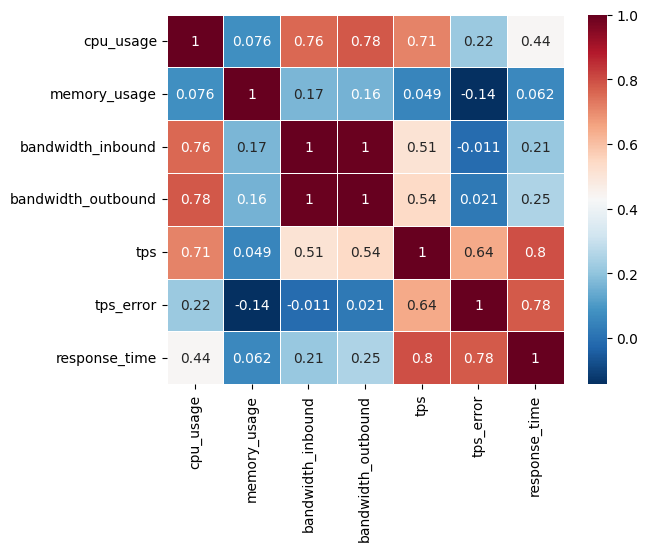

In [75]:
pearsoncorr = df.corr(method='pearson')
sns.heatmap(pearsoncorr,
xticklabels=pearsoncorr.columns,
yticklabels=pearsoncorr.columns,
cmap='RdBu_r',
annot=True,
linewidth=0.5)
plt.show()

### Augmented Dickey-Fuller (ADF)

In [76]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
  r = adfuller(series, autolag='AIC')
  output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
  p_value = output['pvalue']
  def adjust(val, length= 6): 
    return str(val).ljust(length)
  print(f'Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
  print(f'Null Hypothesis: Data has unit root. Non-Stationary.')
  print(f'Significance Level = {signif}')
  print(f'Test Statistic = {output["test_statistic"]}')
  print(f'No. Lags Chosen = {output["n_lags"]}')
  for key,val in r[4].items():
    print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
      print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
      print(f" => Series is Stationary.")
    else:
      print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
      print(f" => Series is Non-Stationary.")

In [77]:
# ADF Test on each column
for name, column in df.items():
    adfuller_test(column, name=column.name)
    print("\n")

Augmented Dickey-Fuller Test on "cpu_usage" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -5.8376
No. Lags Chosen = 13
 Critical value 1%     = -3.433
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -2.863
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


Augmented Dickey-Fuller Test on "memory_usage" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -6.5588
No. Lags Chosen = 15
 Critical value 1%     = -3.433
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -2.863
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10%    = -2.568